<a href="https://colab.research.google.com/github/ayush-09/Twitter-US-Airlines-Sentiment-Anlysis-/blob/master/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Algorithm

- Twitter US Airline Sentiment Dataset from Kaggle: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
- I choose RandomForestClassifier ensemble because the data is imbalance means goes towards negative sentiments after visualizing the data and plot the graph.
- First perfom EDA on the data and then clean the data by performing NLP technique like TFidfVetorizer, then train the data and predict the results to check the accuracy of the model.
- After this I take the random tweet from internet and then check the model is working or not on the particular tweet.

## Connect with drive

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

## Data Visualization

In [ ]:
dataset=pd.read_csv('/content/gdrive/MyDrive/Tweets.csv')
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
dataset.isnull().values.any() # check the nulll values

True

In [ ]:
dataset=dataset.fillna(0) # fill the null values with 0

In [ ]:
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,0,0.0000,Virgin America,0,cairdin,0,0,@VirginAmerica What @dhepburn said.,0,2015-02-24 11:35:52 -0800,0,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,0,0.0000,Virgin America,0,jnardino,0,0,@VirginAmerica plus you've added commercials t...,0,2015-02-24 11:15:59 -0800,0,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,0,0.0000,Virgin America,0,yvonnalynn,0,0,@VirginAmerica I didn't today... Must mean I n...,0,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,jnardino,0,0,@VirginAmerica it's really aggressive to blast...,0,2015-02-24 11:15:36 -0800,0,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,jnardino,0,0,@VirginAmerica and it's a really big bad thing...,0,2015-02-24 11:14:45 -0800,0,Pacific Time (US & Canada)


In [ ]:
print("Rows missing airline sentiment: {}".format(len(dataset.loc[dataset["airline_sentiment"]==0])))
print("Rows missing text: {}".format(len(dataset.loc[dataset["text"]==0])))
print("Rows missing negativereason confidence: {}".format(len(dataset.loc[dataset["negativereason_confidence"]==0])))

Rows missing airline sentiment: 0
Rows missing text: 0
Rows missing negativereason confidence: 5462


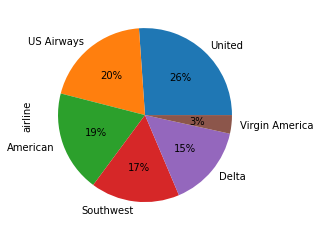

In [ ]:
dataset.airline.value_counts().plot(kind='pie',autopct='%1.0f%%') # plot each value of airline

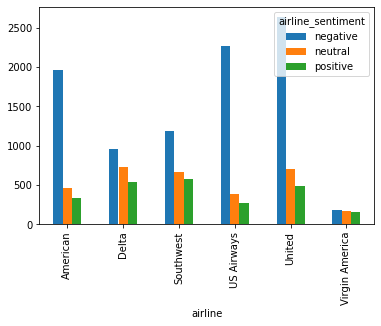

In [ ]:
dataset_sentiment=dataset.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
dataset_sentiment.plot(kind='bar')

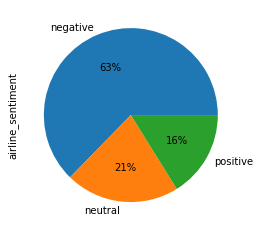

In [ ]:
dataset.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%')

## EDA(Exploratory Data Analysis)


In [ ]:
dataset= dataset.drop(dataset[dataset['airline_sentiment'] == "neutral"].index)

In [ ]:
sent_map={'positive':1,'negative':0}
dataset['airline_sentiment'] = dataset['airline_sentiment'].map(sent_map)
feature=dataset.iloc[:,10].values
label=dataset.iloc[:,1].values

## Clean the Data(Tweets)

In [ ]:
def clean_tweet(feature):
  process_feature=[]
  for tweet in range(0,len(feature)):
      #filter the special character
      clean_tweet = re.sub(r'\W',' ',str(feature[tweet]))
      #filtering out the single characters
      clean_tweet = re.sub(r'\s+[a-zA-Z]\s+',' ',clean_tweet)
      #filtering out single character from the start
      clean_tweet = re.sub(r'\^[a-zA-Z]\s+',' ',clean_tweet)
      #subtituting multiple spaces wih single space
      clean_tweet = re.sub(r'\s+',' ',clean_tweet)
      #removing prefix b
      clean_tweet = re.sub(r'^b\s+','',clean_tweet)
      #lowing
      clean_tweet = clean_tweet.lower()
      clean_tweet = re.sub(r'^\s+','',clean_tweet)
      process_feature.append(clean_tweet)


In [ ]:
pt=clean_tweet(feature)

## Split the dataset by train_test_split()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(pt,label,test_size=0.3,random_state=40)

## Convert the text into vector by TfidfVectorizer


In [ ]:
sent_model= TfidfVectorizer(max_df=0.7,min_df=2,stop_words='english')

In [ ]:
X_train = sent_model.fit_transform(X_train).toarray()
X_test = sent_model.transform(X_test).toarray()

## Train the RandomForest model and predict the result to check the accuracy

In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(X_train,y_train)

pred_r = rf.predict(X_test)
print(accuracy_score(y_test,pred_r))

0.8914236211377419


## Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test,pred_r)
cm

array([[2643,  104],
       [ 272,  444]])

## Save the model

In [ ]:
import joblib
joblib.dump(sent_model,'sentiment-trained-tfidf.pkl')
joblib.dump(rf,'sentiment-rf-model.pkl')


['sentiment-rf-model.pkl']

## Prediction on random Tweet of the model 

In [ ]:
feature1=['@VirginAmerica done! Thank you for the quick response, apparently faster than sitting on hold ;)']
tw = clean_tweet(feature1)

In [ ]:
X_twt = sent_model.transform(tw).toarray()

## Output of the model

In [ ]:
pre = rf.predict(X_twt)
if pre[0]==1:
  print("Positive tweet")
else:
  print("Negative tweet")


Positive tweet
